2021년 10월 9일에 마지막으로 테스트 되었습니다.  

이 자료는 위키독스 '딥 러닝을 이용한 자연어 처리 입문'의 1D CNN 학습 자료입니다.  

링크 : https://wikidocs.net/80783

## **11-03 1D CNN으로 IMDB 리뷰 분류하기**
---
1D CNN을 이용하여 IMDB 리뷰를 분류해보겠습니다. 이전에 다룬 데이터이므로 데이터에 대한 설명은 생략합니다.

---
### **1. 데이터에 대한 전처리**


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
tf.__version__

'2.19.0'

최대 10,000개의 단어만을 허용하여 데이터를 로드합니다.

In [3]:
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words=vocab_size)

X_train을 상위 5개만 출력해봅시다.

In [4]:
print(X_train[:5])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [5]:
print(y_train[:5])

[1 0 0 1 0]


각 샘플의 길이가 긴 관계로 출력 시 중간 내용은 중략하였습니다. 각 샘플은 이미 정수 인코딩까지 전처리가 된 상태입니다. 하지만 각 샘플들의 길이는 서로 다르죠? 패딩을 진행하여 모든 샘플들의 길이를 200으로 맞춥니다.

In [6]:
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

패딩이 되었는지 크기(shape)를 확인해봅시다.

In [7]:
print('X_train의 크기(shape) :', X_train.shape)
print('X_test의 크기(shape) :', X_test.shape)

X_train의 크기(shape) : (25000, 200)
X_test의 크기(shape) : (25000, 200)


In [8]:
X_train[:2]

array([[   5,   25,  100,   43,  838,  112,   50,  670,    2,    9,   35,
         480,  284,    5,  150,    4,  172,  112,  167,    2,  336,  385,
          39,    4,  172, 4536, 1111,   17,  546,   38,   13,  447,    4,
         192,   50,   16,    6,  147, 2025,   19,   14,   22,    4, 1920,
        4613,  469,    4,   22,   71,   87,   12,   16,   43,  530,   38,
          76,   15,   13, 1247,    4,   22,   17,  515,   17,   12,   16,
         626,   18,    2,    5,   62,  386,   12,    8,  316,    8,  106,
           5,    4, 2223, 5244,   16,  480,   66, 3785,   33,    4,  130,
          12,   16,   38,  619,    5,   25,  124,   51,   36,  135,   48,
          25, 1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,
          14,  407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,
         256,    4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,
         476,   26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,
          88,    4,  381,   15,  297, 

훈련 데이터, 테스트 데이터 각 25,000 샘플이 전부 길이 200을 가지는 것을 확인할 수 있습니다. y_train도 출력해봅시다.

---
### **2. 1D CNN으로 IMDB 리뷰 분류하기**


MDB 리뷰 분류를 위한 1D CNN 모델을 설계해봅시다. 하이퍼파라미터인 임베딩 벡터의 차원은 256, 드롭 아웃 비율은 0.3, 커널의 크기는 3이며 해당 커널은 총 256개 사용합니다. 합성곱 층과 맥스풀링 연산 후 전결합층(Fully Connected Layer)을 은닉층을 추가로 사용했는데, 은닉층의 뉴런 수는 128입니다. 해당 모델은 마지막 시점에서 두 개의 선택지 중 하나를 예측하는 이진 분류 문제를 수행하는 모델입니다. 이진 분류 문제의 경우, 출력층에 로지스틱 회귀를 사용해야 하므로 활성화 함수로는 시그모이드 함수를 사용하고, 손실 함수로 크로스 엔트로피 함수를 사용합니다. 20 에포크를 수행합니다.

`EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)`는 검증 데이터 손실(val_loss)이 증가하면, 과적합 징후므로 검증 데이터 손실이 3회 증가하면 정해진 에포크가 도달하지 못하였더라도 학습을 조기 종료(Early Stopping)한다는 의미입니다. ModelCheckpoint를 사용하여 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장합니다. validation_data로는 X_test와 y_test를 사용합니다. val_loss가 줄어들다가 증가하는 상황이 오면 과적합으로 판단하기 위함입니다.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [10]:
# embedding_dim = 256 # 임베딩 벡터의 차원
# dropout_ratio = 0.3 # 드롭아웃 비율
# num_filters = 256 # 커널의 수
# kernel_size = 3 # 커널의 크기
# hidden_units = 128 # 뉴런의 수

In [11]:
model = Sequential()
model.add(Embedding(vocab_size, 256))
model.add(Dropout(0.3))
model.add(Conv1D(256, 3, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model.keras', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

In [14]:
%%time
## pc : EarlyStopping epoch 7
## 4분 소요
# Epoch 7: val_acc did not improve from 0.88464
# 782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - acc: 0.9941 - loss: 0.0187 - val_acc: 0.8775 - val_loss: 0.6058
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_test, y_test), callbacks=[es, mc])

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - acc: 0.6842 - loss: 0.5476 
Epoch 1: val_acc improved from -inf to 0.87296, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - acc: 0.6843 - loss: 0.5475 - val_acc: 0.8730 - val_loss: 0.2975
Epoch 2/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - acc: 0.9065 - loss: 0.2338 
Epoch 2: val_acc improved from 0.87296 to 0.88396, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - acc: 0.9065 - loss: 0.2338 - val_acc: 0.8840 - val_loss: 0.2728
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc: 0.9582 - loss: 0.1217 
Epoch 3: val_acc improved from 0.88396 to 0.88464, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - acc: 0.9582 - loss: 0.1217 - val_acc: 0.8846 - val_loss: 0.3114
Epoch 4/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - acc: 0.9834 - loss: 0.0524 
Epoch 4: val_acc did not improve from 0.88464
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - a

In [16]:
loaded_model = load_model('best_model.keras')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - acc: 0.8827 - loss: 0.3181

 테스트 정확도: 0.8846


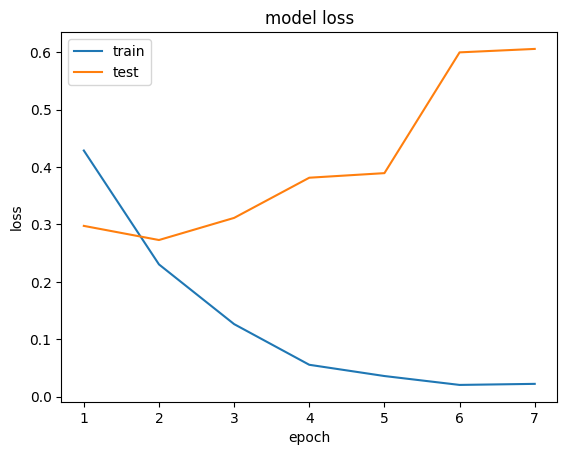

In [17]:
import matplotlib.pyplot as plt
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<Axes: >

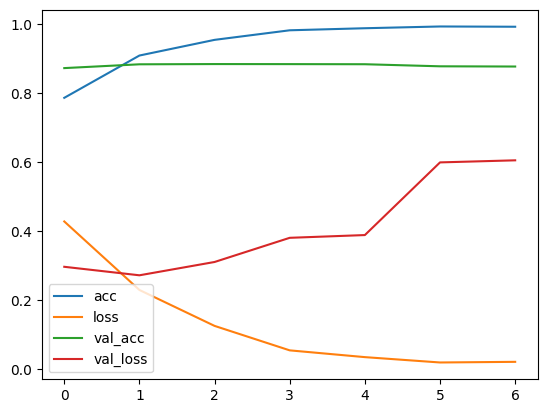

In [20]:
import pandas as pd
df_history = pd.DataFrame(history.history)
df_history.plot()

In [21]:
X_test[:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           1,  591,  202,   14,   31,    6,  717,   10,   10,    2,    2,
           5,    4,  360,    7,    4, 

In [22]:
model.predict(X_test[:5]).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([[0.  ],
       [1.  ],
       [1.  ],
       [0.92],
       [1.  ]], dtype=float32)

In [23]:
y_test[:5]

array([0, 1, 1, 0, 1], dtype=int64)